In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
from qasvm.datasets import Toy2DLinearLoader, Sklearn_DataLoader, Toy2DXORLoader, ToyBlochSphereLoader
from qasvm.preprocessing import DataMultiScaler, DataScaler
from qasvm.classifier import BinarySVM
from qasvm.kernel import Kernel
from sklearn.datasets import make_circles, make_moons, load_breast_cancer
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
from qasvm.circuits.classifier import QASVM, BlochSphereQASVM
from qiskit.aqua.components.optimizers import SLSQP, SPSA
from qiskit.circuit.library import TwoLocal, EfficientSU2
from qiskit.aqua.quantum_instance import QuantumInstance
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq.ibmqbackend import IBMQBackend

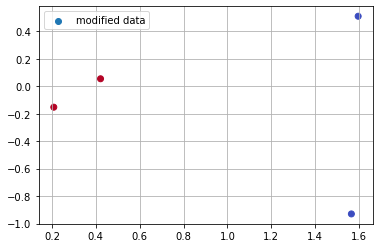

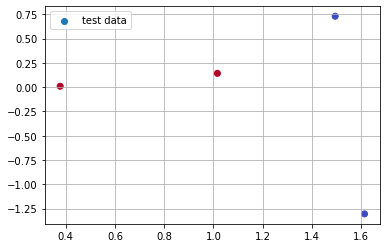

In [4]:

dl = ToyBlochSphereLoader(gap=np.pi/8)
X, y = dl(4, 0.1)
Xt, yt = dl(4, 0.1)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, cmap=plt.cm.coolwarm, label='modified data')
plt.grid()
plt.legend()
plt.figure()
plt.scatter(Xt[:,0], Xt[:,1], marker='o', c=yt, cmap=plt.cm.coolwarm, label='test data')
plt.grid()
plt.legend()

In [5]:
svm11 = BinarySVM(Kernel('Pow2'), C=None, mutation='REDUCED_QASVM', k=0.1)
svm12 = BinarySVM(Kernel('Pow2'), C=1e2, mutation='REDUCED_QASVM', k=0.1)
svm21 = BinarySVM(Kernel('Pow2'), C=1e0, mutation='REDUCED_QASVM', k=0.1)
svm22 = BinarySVM(Kernel('Pow2'), C=1e-10, mutation='REDUCED_QASVM', k=0.1)

svms = [[svm11, svm12], [svm21, svm22]]
for i in range(2):
    for j in range(2):
        svms[i][j].fit(X, y)

1.0 optimal
1.0 optimal
1.0 optimal
0.5 optimal


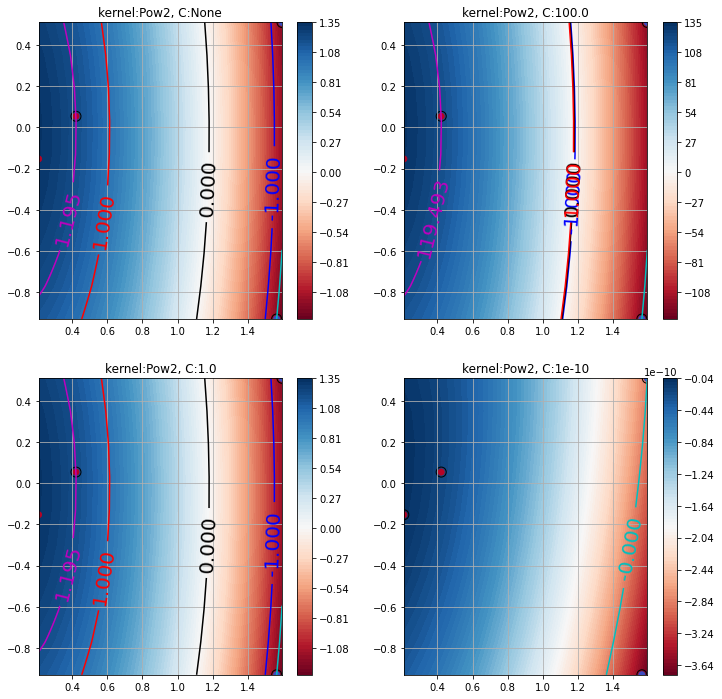

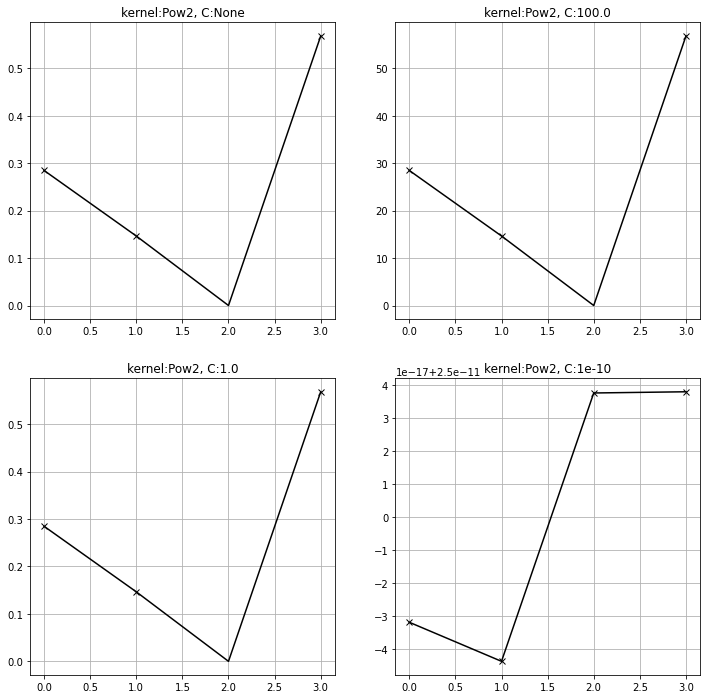

In [6]:
fig1, axes1 = plt.subplots(2, 2, figsize=(12, 12))
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 12))
for i in range(2):
    for j in range(2):
        svms[i][j].plot_boundary(ax=axes1[i][j], fig=fig1)
        axes1[i][j].set_title('kernel:{:}, C:{:}'.format(svms[i][j].kernel, svms[i][j].C))
        svms[i][j].plot('alpha', ax=axes2[i][j])
        axes2[i][j].set_title('kernel:{:}, C:{:}'.format(svms[i][j].kernel, svms[i][j].C))
        print(svms[i][j].accuracy(Xt, yt), svms[i][j].status)

In [7]:
opt = SLSQP()
#feature_map = TwoLocal(1, ['ry', 'rz'], reps=1, skip_final_rotation_layer=True)
from qiskit.circuit import ParameterVector, QuantumCircuit
p = ParameterVector('theta', 2)
qc = QuantumCircuit(1, name='u3')
qc.u3(p[0], p[1], 0, 0)
feature_map = qc
var_form = EfficientSU2(2)
qi = QuantumInstance(QasmSimulator(), shots=2**14)

qasvm = QASVM(var_form=var_form, feature_map=feature_map, optimizer=opt, training_data=X, training_label=y, quantum_instance=qi, C=1, k=0.1).dual
qasvm.second_order_circuit.draw()

‚îå‚îÄ‚îÄ‚îÄ‚îê                                                              ¬ª
 a_0: ‚îÄ‚îÄ‚îÄ‚î§ H ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ¬ª
      ‚îå‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê¬ª
 i_0: ‚î§ RY(Œ∏[0]) ‚îú‚î§ RZ(Œ∏[2]) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ RY(Œ∏[4]) ‚îú‚î§ RZ(Œ∏[6]) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ RY(Œ∏[8]) ‚îú¬ª
      ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§¬ª
 i_1: ‚î§ RY(Œ∏[1]) ‚îú‚î§ RZ(Œ∏[3]) ‚îú‚î§ X ‚îú‚î§ RY(Œ∏[5]) ‚îú‚î§ RZ(Œ∏[7]) ‚îú‚î§ X ‚îú‚î§ RY(Œ∏[9]) ‚îú¬ª
      ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò¬ª
xi_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ¬ª
                                                                            ¬ª
yi_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ¬ª
      ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê¬ª
 j_0: ‚î§ RY(Œ∏[0]) ‚îú‚î§ RZ(Œ∏[2]) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ RY(Œ∏[4]) ‚îú‚î§ RZ(Œ∏[6]) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ RY(Œ∏[8]) ‚îú¬ª
      ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚îÄ‚î¥‚îÄ‚îê‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§¬ª
 j_1: ‚î§ RY(Œ∏[1]) ‚îú‚î§ RZ(Œ∏[3]) ‚îú‚î§ X ‚îú‚î§ RY(Œ∏[5]) ‚îú‚î§ RZ(Œ∏[7]) ‚îú‚î§ X ‚îú‚î§ RY(Œ∏[9]) ‚îú¬ª
      ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò¬ª
xj_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ¬ª
                                                                            ¬ª
yj_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ¬ª
                                                                            ¬ª
 c: 3/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê¬ª
                                                                            ¬ª
¬´                                                                         ¬ª
¬´ a_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ¬ª
¬´      ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê     ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê                       ¬ª
¬´ i_0: ‚î§ RZ(Œ∏[10]) ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ RY(Œ∏[12]) ‚îú‚î§ RZ(Œ∏[14]) ‚îú‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚î

In [8]:
bqasvm = BlochSphereQASVM(var_form=var_form, optimizer=opt, training_data=X, training_label=y, quantum_instance=qi, C=10, k=0.1).primal
bqasvm.run()
bqasvm.accuracy(X, y)

0.5

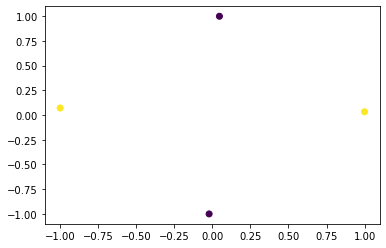

In [9]:
from qasvm.datasets import Toy2DXORLoader
dl = Toy2DXORLoader(0, 1/2, 2/2, 3/2)
X, y = dl(1, 0.1)
plt.scatter(X[:,0], X[:,1], c=y)

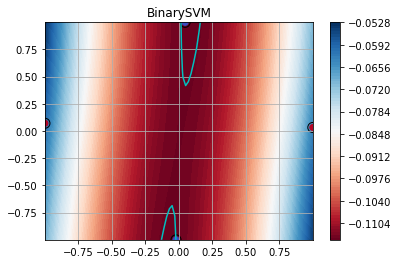

In [10]:
svm = BinarySVM(kernel=Kernel('SingleQubit'), C=None, k=0.1, mutation='REDUCED_uniform_QASVM')
svm.fit(X, y)
svm.plot_boundary()


In [11]:
from qasvm.circuits.classifier import UniformQASVM
qasvm = UniformQASVM(feature_map = feature_map, training_data = X, training_label = y, quantum_instance=qi, C=None, k=0.1)
qasvm.run()
qasvm.accuracy(X, y)

0.5

In [12]:
qasvm.classifier_circuit.draw()

‚îå‚îÄ‚îÄ‚îÄ‚îê                                            ‚îå‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îê
 a_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ H ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚î§ H ‚îú‚î§M‚îú
             ‚îú‚îÄ‚îÄ‚îÄ‚î§                                          ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚ï•‚îò
 i_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ H ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ
             ‚îú‚îÄ‚îÄ‚îÄ‚î§         ‚îÇ     ‚îÇ    ‚îÇ     ‚îÇ     ‚îÇ    ‚îÇ    ‚îÇ       ‚ïë 
 i_1: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ H ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ
             ‚îî‚îÄ‚îÄ‚îÄ‚îò       ‚îå‚îÄ‚î¥‚îÄ‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îÄ‚îê ‚îÇ       ‚ïë 
xi_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ u3 ‚îú‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚î§ u3 ‚îú‚î§ u3 ‚îú‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚î§ u3 ‚îú‚îÄX‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ
                         ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚î¨‚îÄ‚î¨‚îÄ‚îò ‚îÇ       ‚ïë 
yi_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚î§M‚îú‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ
      ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê      ‚îî‚îÄ‚îÄ‚îÄ‚îò            ‚îî‚îÄ‚îÄ‚îÄ‚îò ‚îî‚ï•‚îò   ‚îÇ       ‚ïë 
xj_0: ‚î§ U3(ùí≥[0],ùí≥[1],0) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ‚îÄ‚îÄ‚îÄX‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ
      ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò                              ‚ïë            ‚ïë 
 c: 2/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï©‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï©‚ïê
                                                       1            0

In [13]:
X = np.random.rand(4, 2)
print(qasvm.f(X))
print(svm.f(X))

[8.89746094 7.8182373  7.89355469 8.54650879]
[-0.11345675 -0.08686149 -0.08653085 -0.10223696]


In [14]:
qasvm._construct_first_order_circuit(X[0]).draw()

‚îå‚îÄ‚îÄ‚îÄ‚îê                                            ¬ª
 a_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ H ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ¬ª
                          ‚îú‚îÄ‚îÄ‚îÄ‚î§                                            ¬ª
 i_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ H ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ¬ª
                          ‚îú‚îÄ‚îÄ‚îÄ‚î§                       ‚îÇ     ‚îÇ    ‚îÇ     ‚îÇ   ¬ª
 i_1: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ H ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ¬ª
                          ‚îî‚îÄ‚îÄ‚îÄ‚îò                     ‚îå‚îÄ‚î¥‚îÄ‚îÄ‚îê  ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îÄ‚îê‚îå‚îÄ‚î¥‚îÄ‚îÄ‚îê¬ª
xi_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ u3 ‚îú‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚î§ u3 ‚îú‚î§ u3 ‚îú¬ª
                                                    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îò¬ª
yi_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ¬ª
      ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê      ‚îî‚îÄ‚îÄ‚îÄ‚îò            ¬ª
xj_0: ‚î§ U3(0.153772643144315,0.0842169236749031,0) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ¬ª
      ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò                       ¬ª
 c: 2/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê¬ª
                                                                           ¬ª
¬´                    ‚îå‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îê
¬´ a_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚î§ H ‚îú‚î§M‚îú
¬´                  ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚ï•‚îò
¬´ i_0: ‚îÄ‚îÄo‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ
¬´        ‚îÇ    ‚îÇ    ‚îÇ       ‚ïë 
¬´ i_1: ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ
¬´        ‚îÇ  ‚îå‚îÄ‚î¥‚îÄ‚îÄ‚îê ‚îÇ       ‚ïë 
¬´xi_0: ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚î§ u3 ‚îú‚îÄX‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ
¬´      ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚î¨‚îÄ‚î¨‚îÄ‚îò ‚îÇ       ‚ïë 
¬´yi_0: ‚î§ X ‚îú‚îÄ‚î§M‚îú‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ
¬´      ‚îî‚îÄ‚îÄ‚îÄ‚îò ‚îî‚ï•‚îò   ‚îÇ       ‚ïë 
¬´xj_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ‚îÄ‚îÄ‚îÄX‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ
¬´             ‚ïë            ‚ïë 
¬´ c: 2/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï©‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï©‚ïê
¬´             1            0

In [15]:
qasvm._evaluate_classifier_circuit(X[1])

{'ayk_x': 0.0853271484375, 'ay_x': 0.769287109375}

In [16]:
qc = QuantumCircuit(3)
qc.h((0, 1))
qc.ucry([0, np.pi, 0, np.pi], [0, 1], 2)
qc.snapshot('0')
qc.ucry([0, np.pi, 0, np.pi], [0, 1], 2)
qc.h((0, 1))
#qc+=qc.inverse()
qc.measure_all()
qi.execute(qc).get_counts()


{'001': 16384}

In [17]:
qc = QuantumCircuit(3)
qc.h((0, 1))
qc.snapshot('0')
qc.ucrx([0, np.pi, 0, np.pi], [0, 1], 2)
qc.ucrx([0, np.pi, 0, np.pi], [0, 1], 2)
qc.snapshot('1')
qc.h((0, 1))
qc.draw()

‚îå‚îÄ‚îÄ‚îÄ‚îê ‚ñë ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚ñë ‚îå‚îÄ‚îÄ‚îÄ‚îê
q_0: ‚î§ H ‚îú‚îÄ‚ñë‚îÄ‚î§1               ‚îú‚î§1               ‚îú‚îÄ‚ñë‚îÄ‚î§ H ‚îú
     ‚îú‚îÄ‚îÄ‚îÄ‚î§ ‚ñë ‚îÇ                ‚îÇ‚îÇ                ‚îÇ ‚ñë ‚îú‚îÄ‚îÄ‚îÄ‚î§
q_1: ‚î§ H ‚îú‚îÄ‚ñë‚îÄ‚î§2 UCRX(0,œÄ,0,œÄ) ‚îú‚î§2 UCRX(0,œÄ,0,œÄ) ‚îú‚îÄ‚ñë‚îÄ‚î§ H ‚îú
     ‚îî‚îÄ‚îÄ‚îÄ‚îò ‚ñë ‚îÇ                ‚îÇ‚îÇ                ‚îÇ ‚ñë ‚îî‚îÄ‚îÄ‚îÄ‚îò
q_2: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚î§0               ‚îú‚î§0               ‚îú‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
           ‚ñë ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò ‚ñë

In [18]:
result = qi.execute(qc)
result.data()['snapshots']['statevector']

{'1': [array([ 5.00000000e-01+1.38777878e-17j, -5.00000000e-01+2.43882596e-17j,
          5.00000000e-01+3.05391888e-34j, -5.00000000e-01-9.11568390e-18j,
         -5.07326818e-18+5.07326818e-18j, -1.11855716e-17-1.17445770e-16j,
         -5.07326818e-18+5.07326818e-18j,  6.73190513e-17-1.61460186e-16j])],
 '0': [array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
         0. +0.j])]}

In [19]:
from qiskit.circuit.library import U3Gate, XGate, IGate, RXGate
from qiskit import QuantumRegister, ClassicalRegister
qr = QuantumRegister(3)
cr = ClassicalRegister(1)
y = np.array([0, 0, 0, 0])
gs = [XGate().to_matrix() if ny<0.5 else IGate().to_matrix() for ny in y]
qc = QuantumCircuit(qr, cr, global_phase=0)
qc.snapshot('0')
qc.h((1, 2))
#qc.ucrx(list(np.where(y<0.5, np.pi, 0)), [1, 2], 0)
qc.uc(gs, [0, 1], 2)
#multiplexer(qc, gs, [1, 2], 0)
qc.h((1, 2))
qc.snapshot('1')
qc.measure(qr[0], cr)
result = qi.execute(qc)
result.data()['snapshots']

{'statevector': {'1': [array([ 1.00000000e+00-1.22464680e-16j,  0.00000000e+00+0.00000000e+00j,
          -1.73268086e-16+6.12323400e-17j,  0.00000000e+00+0.00000000e+00j,
           1.01465364e-17+6.12323400e-17j,  0.00000000e+00+0.00000000e+00j,
          -1.62588398e-17-5.96202067e-33j,  0.00000000e+00+0.00000000e+00j])],
  '0': [array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])]}}

In [20]:
qc.draw()

‚ñë      ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê      ‚ñë ‚îå‚îÄ‚îê
q1039_0: ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§1             ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚î§M‚îú
          ‚ñë ‚îå‚îÄ‚îÄ‚îÄ‚îê‚îÇ              ‚îÇ‚îå‚îÄ‚îÄ‚îÄ‚îê ‚ñë ‚îî‚ï•‚îò
q1039_1: ‚îÄ‚ñë‚îÄ‚î§ H ‚îú‚î§2 MULTIPLEXER ‚îú‚î§ H ‚îú‚îÄ‚ñë‚îÄ‚îÄ‚ï´‚îÄ
          ‚ñë ‚îú‚îÄ‚îÄ‚îÄ‚î§‚îÇ              ‚îÇ‚îú‚îÄ‚îÄ‚îÄ‚î§ ‚ñë  ‚ïë 
q1039_2: ‚îÄ‚ñë‚îÄ‚î§ H ‚îú‚î§0             ‚îú‚î§ H ‚îú‚îÄ‚ñë‚îÄ‚îÄ‚ï´‚îÄ
          ‚ñë ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îò ‚ñë  ‚ïë 
   c0: 1/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï©‚ïê
                                          0

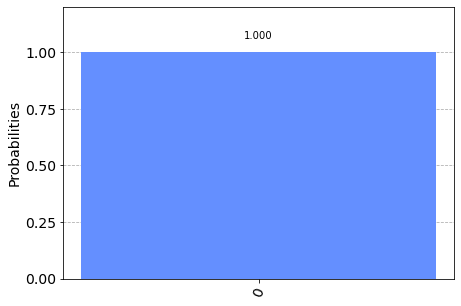

In [21]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts())

In [22]:
_plot(result.data()['snapshots']['statevector']['1'])

NameError: name '_plot' is not defined

In [60]:
from qiskit.extensions import UnitaryGate
def multiplexer(qc, gate_list, ctrl_Q, target_Q):
    for i in range(len(gate_list)):
        ug = UnitaryGate(gate_list[i], label=f'Data_{i}')
        qc.append(ug.control(len(ctrl_Q), ctrl_state=i), qargs=[qc.qubits[n] for n in ctrl_Q]+[qc.qubits[target_Q]])

In [85]:
from matplotlib import pyplot as plt
def _plot(array):
    plt.plot([np.abs(a)**2 for a in array])

In [184]:
array = result.data()['snapshots']['statevector']['1']
def _plot(array):
    plt.plot(np.abs(array).flatten()**2)
    plt.ylim([0, 1])

In [30]:
from qasvm.circuits.classifier import QASVM, BlochSphereQASVM, UniformBlochQASVM, UniformQASVM
from qiskit import transpile
qasvm = BlochSphereQASVM(var_form = var_form, training_data = X, training_label = y, optimizer = opt, quantum_instance = qi).dual
transpile(qasvm.second_order_circuit, basis_gates = ['rx', 'ry', 'rz', 'cx']).depth()

72

In [31]:
qasvm.run()
qasvm.accuracy(X, y)

0.0

In [37]:
qasvm = UniformBlochQASVM(training_data = X, training_label = y, quantum_instance=qi)
qasvm.run()
qasvm.classifier_circuit.draw()

‚îå‚îÄ‚îÄ‚îÄ‚îê                                            ‚îå‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îê
 a_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ H ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚î§ H ‚îú‚î§M‚îú
             ‚îú‚îÄ‚îÄ‚îÄ‚î§       ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îî‚ï•‚îò
 i_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ H ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§1             ‚îú‚î§1               ‚îú‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ
             ‚îú‚îÄ‚îÄ‚îÄ‚î§       ‚îÇ              ‚îÇ‚îÇ                ‚îÇ ‚îÇ       ‚ïë 
 i_1: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ H ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§2 MULTIPLEXER ‚îú‚î§2               ‚îú‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ
             ‚îî‚îÄ‚îÄ‚îÄ‚îò       ‚îÇ              ‚îÇ‚îÇ  UCRX(œÄ,œÄ,œÄ,œÄ) ‚îÇ ‚îÇ       ‚ïë 
xi_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§0             ‚îú‚î§                ‚îú‚îÄX‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï´‚îÄ
                         ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îÇ                ‚îÇ ‚îÇ  ‚îå‚îÄ‚îê  ‚ïë 
yi_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§0               ‚îú‚îÄ‚îº‚îÄ‚îÄ‚î§M‚îú‚îÄ‚îÄ‚ï´‚îÄ
      ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò ‚îÇ  ‚îî‚ï•‚îò  ‚ïë 
xj_0: ‚î§ U3(ùí≥[0],ùí≥[1],0) ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄX‚îÄ‚îÄ‚îÄ‚ï´‚îÄ‚îÄ‚îÄ‚ï´‚îÄ
      ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò                                       ‚ïë   ‚ïë 
 c: 2/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï©‚ïê‚ïê‚ïê‚ï©‚ïê
                                                                1   0

In [23]:
qasvm.f(X)

array([8.93066406, 7.83569336, 7.93273926, 8.48083496])